First, initialize the easy test data:

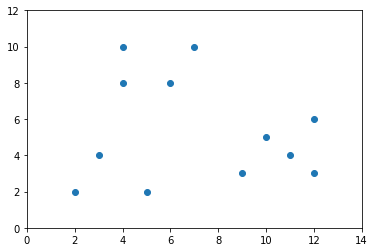

In [230]:
from matplotlib import pyplot as plt
import numpy as np
points = [[4,10],[7,10],[4,8],[6,8],[3,4],[2,2],[5,2],[10,5],[9,3],[12,3],[11,4],[12,6]]
points = np.array(points)
plt.scatter(points[:,0],points[:,1])
plt.xlim(0,14)
plt.ylim(0,12)
plt.show()

Let us start with the ideal case where the initial centroids are very far away from each other. To calculate the distance, use the following function:

In [231]:
k = 3
centroids = [[4,10],[2,2],[12,3]]
def dis(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

After one iteration, each point is assigned to one class:

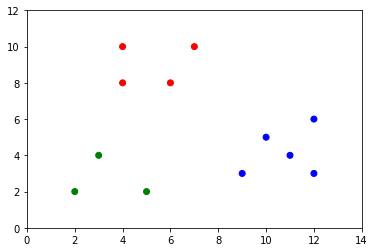

In [232]:
def assign(points,centroids,k):
    classes = []
    for point in points:
        distances = [dis(point,centroids[i]) for i in range(k)]
        classes.append(np.argmin(distances))
    return classes
colors = ['r','g','b']
classes = assign(points,centroids,k)
plt.scatter(points[:,0],points[:,1],c = [colors[i] for i in classes])
plt.xlim(0,14)
plt.ylim(0,12)
plt.show()

Now update the centroids:

In [233]:
def update(points,classes,k):
    tmp_sum = []
    tmp_count = []
    for i in range(k):
        tmp_sum.append([0,0])
        tmp_count.append(0)
    for i in range(len(points)):
        tmp_sum[classes[i]][0] += points[i][0]
        tmp_sum[classes[i]][1] += points[i][1]
        tmp_count[classes[i]] += 1
    return [[tmp_sum[i][0]/tmp_count[i],tmp_sum[i][1]/tmp_count[i]] for i in range(k)]
centroids = update(points,classes,k)
print(centroids)

[[5.25, 9.0], [3.3333333333333335, 2.6666666666666665], [10.8, 4.2]]


So the k-means algorithm is implemented as follows:

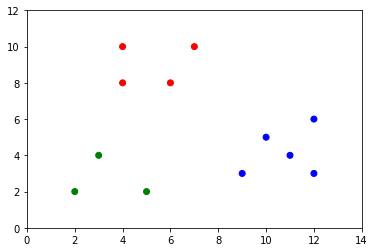

In [234]:
def kmeans(points,centroids,k):
    while(True):
        classes = assign(points,centroids,k)
        new_centroids = update(points,classes,k)
        if(centroids==new_centroids):  #check whether centroid unchanged
            break
        centroids = new_centroids
        print(centroids)
    return classes
colors = ['r','g','b']
classes = kmeans(points,centroids,k)
plt.scatter(points[:,0],points[:,1],c = [colors[i] for i in classes])
plt.xlim(0,14)
plt.ylim(0,12)
plt.show()

Now test our code on a larger test set as shown below:

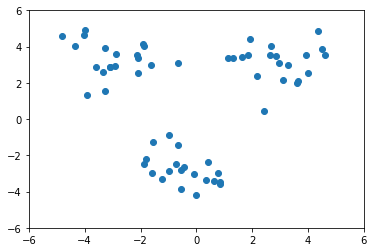

In [235]:
points = [[3.275154, 2.957587], [-3.344465, 2.603513], [0.355083, -3.376585], [1.852435, 3.547351], [-2.078973, 2.552013],
          [-0.993756, -0.884433], [2.682252, 4.007573], [-3.087776, 2.878713], [-1.565978, -1.256985], [2.441611, 0.444826],
          [-0.659487, 3.111284], [-0.459601, -2.618005], [2.17768, 2.387793], [-2.920969, 2.917485], [-0.028814, -4.168078],
          [3.625746, 2.119041], [-3.912363, 1.325108], [-0.551694, -2.814223], [2.855808, 3.483301], [-3.594448, 2.856651],
          [0.421993, -2.372646], [1.650821, 3.407572], [-2.082902, 3.384412], [-0.718809, -2.492514], [4.513623, 3.841029],
          [-4.822011, 4.607049], [-0.656297, -1.449872], [1.919901, 4.439368], [-3.287749, 3.918836], [-1.576936, -2.977622],
          [3.598143, 1.97597], [-3.977329, 4.900932], [-1.79108, -2.184517], [3.914654, 3.559303], [-1.910108, 4.166946],
          [-1.226597, -3.317889], [1.148946, 3.345138], [-2.113864, 3.548172], [0.845762, -3.589788], [2.629062, 3.535831], 
          [-1.640717, 2.990517], [-1.881012, -2.485405], [4.606999, 3.510312], [-4.366462, 4.023316], [0.765015, -3.00127],
          [3.121904, 2.173988], [-4.025139, 4.65231], [-0.559558, -3.840539], [4.376754, 4.863579], [-1.874308, 4.032237], 
          [-0.089337, -3.026809], [3.997787, 2.518662], [-3.082978, 2.884822], [0.845235, -3.454465], [1.327224, 3.358778],
          [-2.889949, 3.596178], [-0.966018, -2.839827], [2.960769, 3.079555], [-3.275518, 1.577068], [0.639276, -3.41284]]
points = np.array(points)
plt.scatter(points[:,0],points[:,1])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

We require 6 clusters this time and randomly initialize the centroids. We find that the clustering results and the number of iterations vary greatly given different initialization. (You can run the following block multiple times to check)

centroids


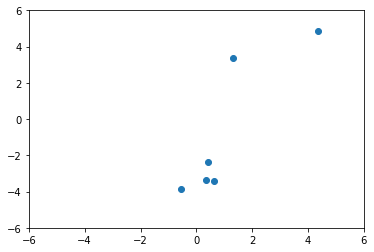

number of iterations: 5


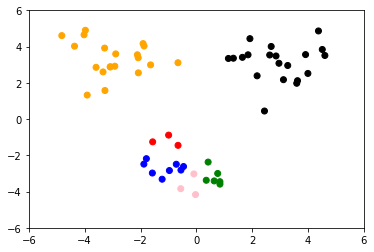

In [247]:
k = 6
import random
centroids = [list(points[i]) for i in random.sample(range(len(points)),k)]
def dis(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5
print('centroids')
plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

def kmeans(points,centroids,k):
    iters = 0
    while(True):
        classes = assign(points,centroids,k)
        new_centroids = update(points,classes,k)
        if(centroids==new_centroids):  #check whether centroid unchanged
            print('number of iterations:',iters)
            break
        centroids = new_centroids
        iters += 1
    return classes
colors = ['r','g','b','black','orange','pink','yellow']
classes = kmeans(points,centroids,k)
plt.scatter(points[:,0],points[:,1],c = [colors[i] for i in classes])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()

Therefore, to improve clustering, we hope to (1) obtain similar and reasonable results each time, (2) fewer iterations are needed for clustering. To address this, an intuitive way is to make the initial centroids far from each other. 

K-means++ is a solution to this. Moreover, the first centroid can have a higher probability to be selected far from the center of all points. The improved K-means++ algorithm is implemented as follows:

centroids


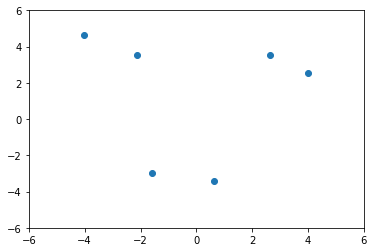

number of iterations: 3


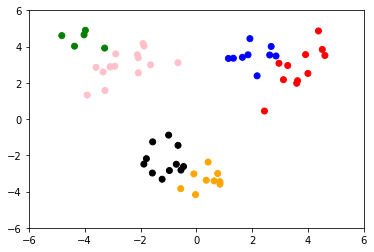

In [257]:
def dis(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

import random
def centroid_select(points,k):
    centroids = [list(np.mean(points,axis = 0))]   #the centroid of all points
    while(len(centroids)<=k):
        dis_to_near_cen = []
        for p in points:
            tmp_dis = [dis(p,centroids[i])**2 for i in range(len(centroids))]
            dis_to_near_cen.append(min(tmp_dis))
        dis_to_near_cen = np.array(dis_to_near_cen)
        dis_to_near_cen /= np.sum(dis_to_near_cen)
        chosen = list(random.choices(points,weights = dis_to_near_cen,k=1)[0])
        centroids.append(chosen)
    return centroids[1:]              # the initial center is excluded
k = 6
centroids = centroid_select(points,k)
print('centroids')
plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()



def kmeans(points,centroids,k):
    iters = 0
    while(True):
        classes = assign(points,centroids,k)
        new_centroids = update(points,classes,k)
        if(centroids==new_centroids):  #check whether centroid unchanged
            print('number of iterations:',iters)
            break
        centroids = new_centroids
        iters += 1
    return classes
colors = ['r','g','b','black','orange','pink','yellow']
classes = kmeans(points,centroids,k)
plt.scatter(points[:,0],points[:,1],c = [colors[i] for i in classes])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.show()